In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
U = [1, 2, 3]
S = {'S_0': [U[2]], 'S_1': [U[0], U[2]], 'S_2': [U[0]], 'S_3': [U[1]], 'S_4': [U[0], U[1]]}

In [3]:
from python_package.exact_cover_circ import Exact_Cover_QCirc
from pytket.circuit.display import render_circuit_jupyter as draw

In [4]:
ExactCover = Exact_Cover_QCirc(U,S,num_solutions=3)
ExactCover.assemble_full_circuit_w_meas() # Build the circuit
draw(ExactCover.main_circuit)

In [5]:
# Simulate the circuit

from pytket.extensions.qiskit import AerBackend
from pytket.passes import FlattenRegisters
from pytket.utils import probs_from_counts

backend = AerBackend()
flatten = FlattenRegisters()
flatten.apply(ExactCover.main_circuit)
compiled_circ = backend.get_compiled_circuit(ExactCover.main_circuit)

handle = backend.process_circuit(compiled_circ, n_shots=1024)
counts = backend.get_result(handle).get_counts()

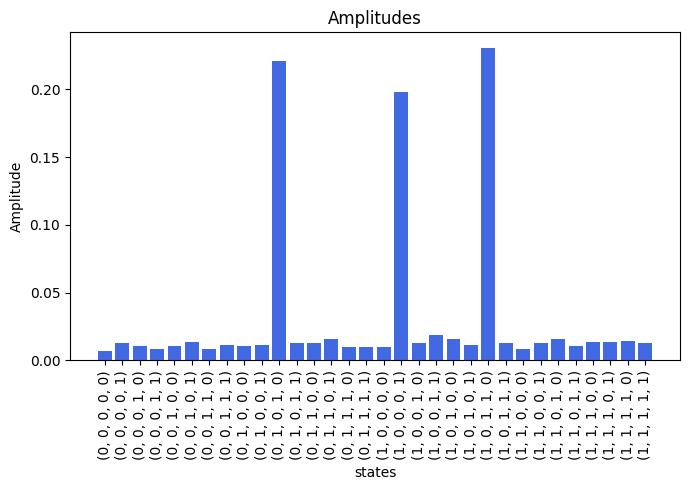

In [6]:
import matplotlib.pyplot as plt

data = probs_from_counts(counts)

# Extract keys and values
keys = list(data.keys())
values = list(data.values())

# Convert keys to string representation for plotting
keys_str = [str(key) for key in keys]

# Create the bar plot
plt.figure(figsize=(7, 5))
plt.bar(keys_str, values, color='royalblue')

# Add title and labels
plt.title('Amplitudes')
plt.xlabel('states')
plt.ylabel('Amplitude')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

Reference: J.-R. Jiang, Y.-J. Wang, "_Quantum Circuit Based on Grover’s Algorithm to Solve Exact Cover Problem_" in Proc. 2023 VTS Asia Pacific Wireless Communications Symposium (APWCS), Tainan, Taiwan, Aug. 2023, DOI: 10.1109/APWCS60142.2023.10234054